The purpose of this code is to read some data (two column, comma-seperated) from a file, plot the data with appropriate axis labels, title, etc., and finally fit the data with a user-defined fit function.  The code will extra the fit parameters and uncertainties, and plot those in the legend.

In order to do this, we are going to use the matplotlib (for plotting), numpy (for file reading, and other mathematical operations), and scipy (for curve fitting) Python libraries.  We begin by importing these three libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

The next step is to define two lists, x and y, which will hold the x and y data to be plotted.

In [2]:
x = []
y = []

We need to define a fit function.  In this case, we will define a quadratic function.

In [3]:
def fitfunction(x,a,b,c):
    return a*x*x + b*x + c

We now use the loadtxt method of the numpy library to read the data into the x and y lists defined above.  We must specify the delimiter that separates the x and y column data in the data file (a comma in this case).  Finally, we must specify that we wish the loadtxt method to unpack the data into the two separate x and y lists.

In [4]:
x, y = np.loadtxt('Previous_Examples/example.dat', delimiter=',',unpack=True)

We will now use the curve_fit method to fit the (x,y) data using the fitting function defined above.  Curve_fit returns two very useful objects - popt, which is a list of the fit parameters (a, b, and c in this case), and pcov, which is the covariance matrix of the fit.  The covariance matrix is an (m x m) matrix, where m is the number of fit parameters (3 in this case), and can be used to extract the uncertainties in the fit parameters.

In [5]:
popt,pcov = curve_fit(fitfunction,x,y)

The uncertainties in the fit parameters are given by the square-root of the diagonal elements of the covariance matrix.

In [6]:
perr = np.sqrt(np.diag(pcov))

To make the plot look a bit nicer, we add labels to the x and y axes, and a title.

To plot the actual experimental data, we will use the scatter method, and add a label for the legend.

To plot the fit to the data, we will use the plot method, using the x-values from the data, and calculating the y-values from the fitfunction defined above with the optimized a,b, and c parameters.  

We plot the fit as a red line (r-) and give it an appropriate label based on the fit parameters along with their uncertainties.

Finally, we plot the legend.

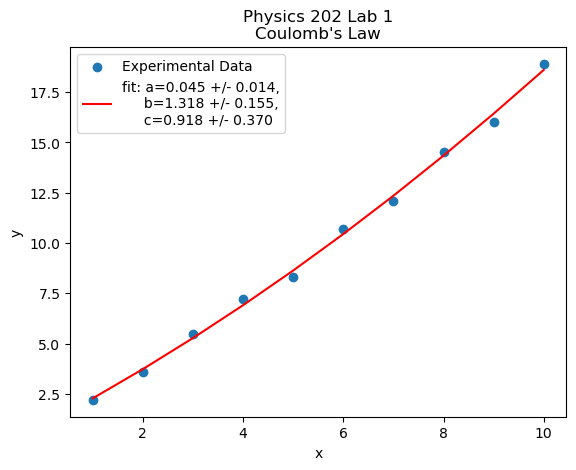

In [7]:
plt.xlabel('x')
plt.ylabel('y')
plt.title("Physics 202 Lab 1\nCoulomb's Law")

plt.scatter(x,y,label='Experimental Data')

plt.plot(x,fitfunction(x,*popt),'r-',
         label='fit: a=%5.3f +/- %5.3f,\n     b=%5.3f +/- %5.3f,\n     c=%5.3f +/- %5.3f' % 
         (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

plt.legend()